# Buying a Home

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',200)

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Now we will try to convert ordinal categorical variables to numerical ones depending data_desc.docx

In [4]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
df.LotShape=df.LotShape.map({'IR3':1,'IR2':2,'IR1':3,'Reg':4})

In [9]:
df.Utilities=df.Utilities.map({'ELO':1,'NoSeWa':2,'NoSewr':3,'AllPub':4})

In [10]:
df.LandSlope=df.LandSlope.map({'Sev':1,'Mod':2,'Gtl':3})

In [11]:
df.ExterQual=df.ExterQual.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [12]:
df.ExterCond=df.ExterCond.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [13]:
df.HeatingQC=df.HeatingQC.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [14]:
df.CentralAir=df.CentralAir.map({'N':0,'Y':1})

In [15]:
df.KitchenQual=df.KitchenQual.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [16]:
df.Functional=df.Functional.map({'Sal':1,'Sev':2,'Maj1':3,'Maj2':4,'Mod':5,'Min1':6,'Min2':7,'Typ':8})

In [17]:
df.PavedDrive=df.PavedDrive.map({'N':0,'P':1,'Y':2})

In [18]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,4,Lvl,4,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,2,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,4,Lvl,4,FR2,3,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,2,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,3,Lvl,4,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,2,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,3,Lvl,4,Corner,3,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,2,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,3,Lvl,4,FR2,3,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,2,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
df.drop(labels=['Id'], axis='columns', inplace=True)

KeyError: "['Id'] not found in axis"

In [20]:
df.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'Utilities',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Let's plot a correlation matrix to check the relation between SalePrice and other numerical variables

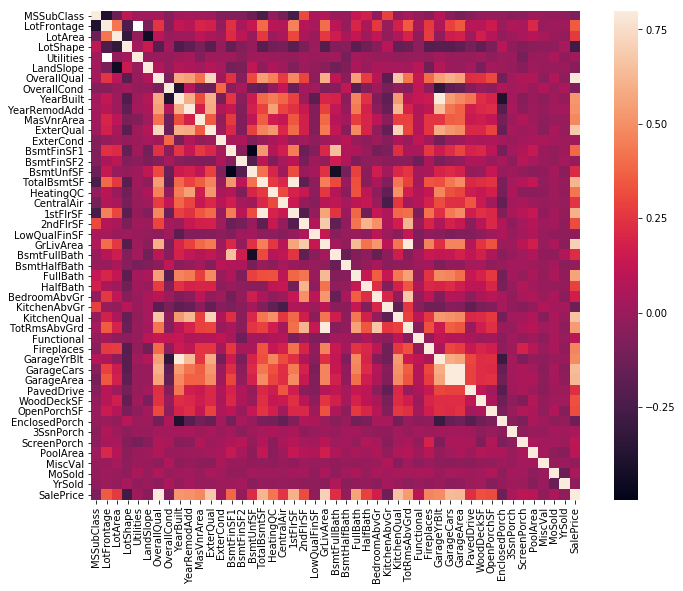

In [21]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## We will select top 10 features excluding SalePrice to relate

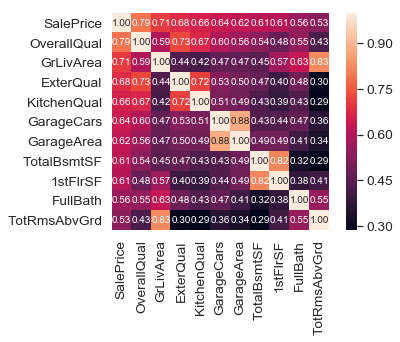

In [22]:
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [17]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,ExterQual
4,KitchenQual
5,GarageCars
6,GarageArea
7,TotalBsmtSF
8,1stFlrSF
9,FullBath


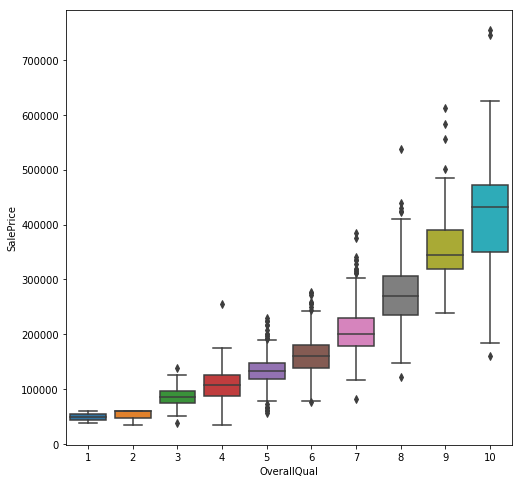

In [19]:
data=pd.concat([df['SalePrice'],df['OverallQual']],axis=1)
f,ax=plt.subplots(figsize=(8,8))
sns.boxplot(x="OverallQual",y="SalePrice",data=data)

### As expected SalePrice should increase as OverallQual increases, so, we can say that isn't the possibility of outliers

Text(0, 0.5, 'SalePrice')

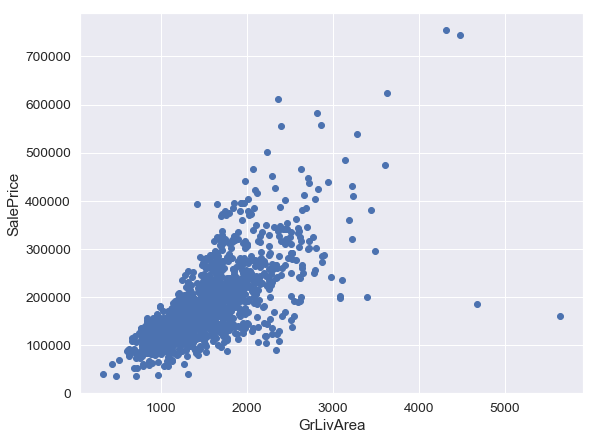

In [33]:
plt.subplots(figsize=(9,7))
plt.scatter(df['GrLivArea'],df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

### People will pay more for more living area, therefore there are two outliers in the lower right part of the scatter plot

In [20]:
df = df.drop(df[(df['SalePrice']<200000) & (df['GrLivArea']>4000)].index).reset_index(drop=True)

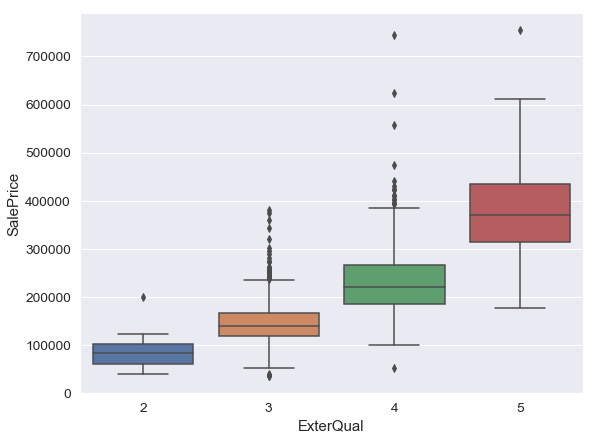

In [37]:
data=pd.concat([df['SalePrice'],df['ExterQual']],axis=1)
f,ax=plt.subplots(figsize=(9,7))
sns.boxplot(x="ExterQual",y="SalePrice",data=data)

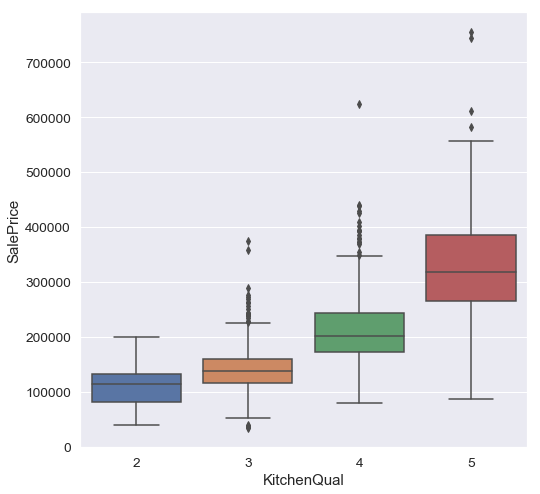

In [38]:
data=pd.concat([df['SalePrice'],df['KitchenQual']],axis=1)
f,ax=plt.subplots(figsize=(8,8))
sns.boxplot(x="KitchenQual",y="SalePrice",data=data)

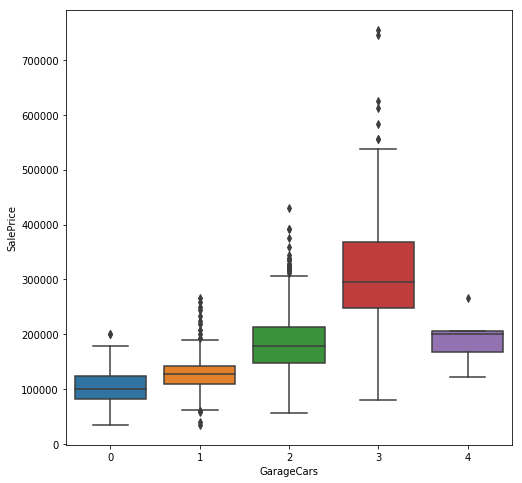

In [21]:
data=pd.concat([df['SalePrice'],df['GarageCars']],axis=1)
f,ax=plt.subplots(figsize=(8,8))
sns.boxplot(x="GarageCars",y="SalePrice",data=data)

### As the number of cars that can be parked in the garage increases the price should increase but for 4 cars its not the case.

In [27]:
df=df.drop(df[df['GarageCars']==4].index).reset_index(drop=True)

Text(0, 0.5, 'SalePrice')

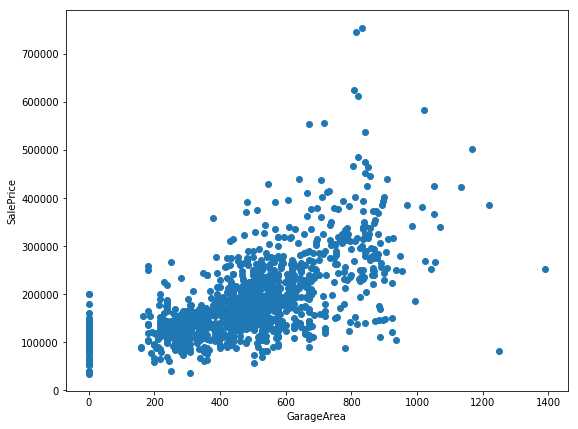

In [28]:
plt.subplots(figsize=(9,7))
plt.scatter(df['GarageArea'],df['SalePrice'])
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

### Two outliers can be seen towards the bottom right

In [29]:
df=df.drop(df[(df['GarageArea']>1200) & (df['SalePrice']<300000)].index).reset_index(drop=True)

Text(0, 0.5, 'SalePrice')

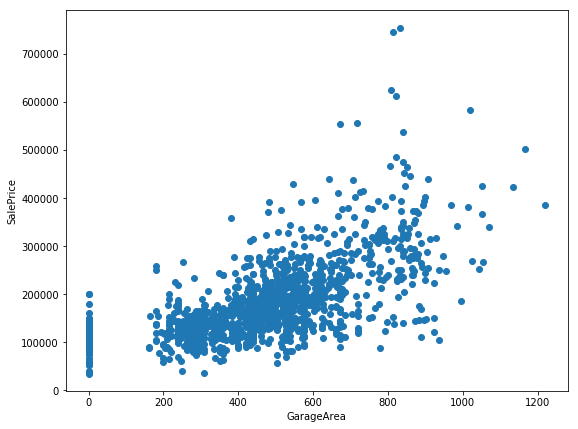

In [30]:
plt.subplots(figsize=(9,7))
plt.scatter(df['GarageArea'],df['SalePrice'])
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

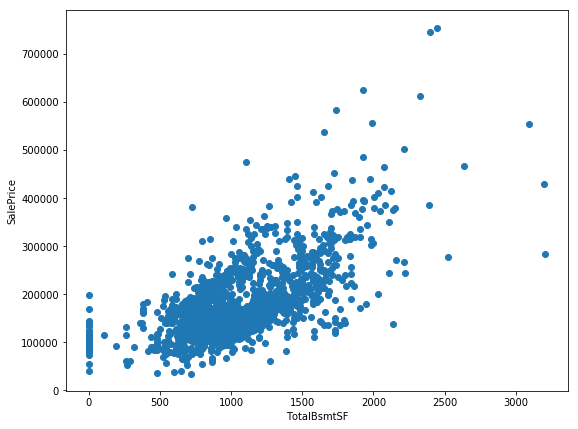

In [31]:
plt.subplots(figsize=(9,7))
plt.scatter(df['TotalBsmtSF'],df['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

In [32]:
df=df.drop(df[(df['TotalBsmtSF']>3000) & (df['SalePrice']<500000)].index).reset_index(drop=True)

Text(0, 0.5, 'SalePrice')

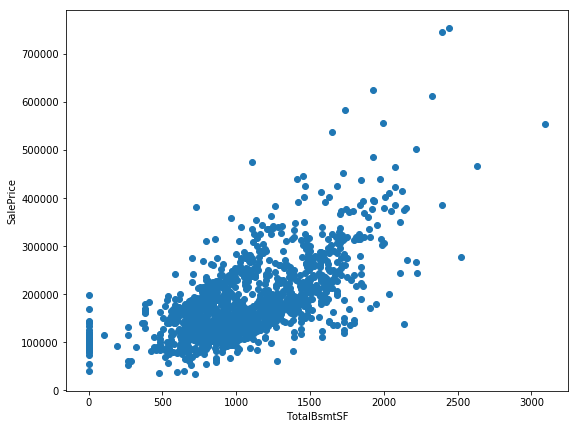

In [33]:
plt.subplots(figsize=(9,7))
plt.scatter(df['TotalBsmtSF'],df['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

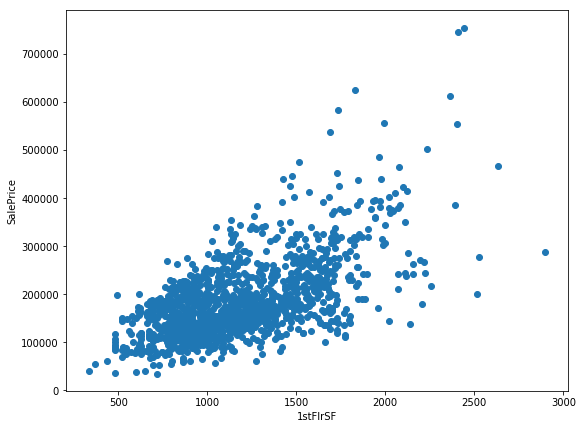

In [34]:
plt.subplots(figsize=(9,7))
plt.scatter(df['1stFlrSF'],df['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')

### 1stFlrSF looks fine

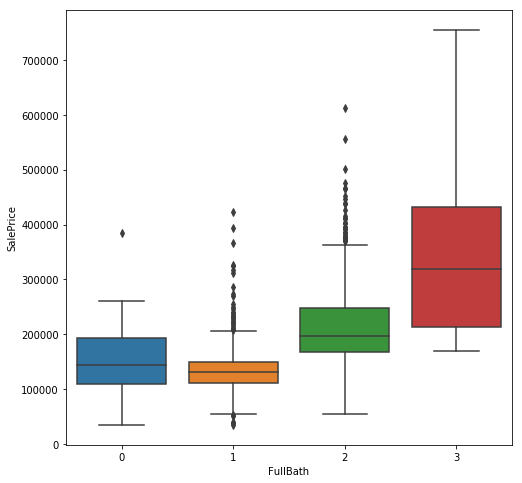

In [36]:
data=pd.concat([df['SalePrice'],df['FullBath']],axis=1)
f,ax=plt.subplots(figsize=(8,8))
sns.boxplot(x="FullBath",y="SalePrice",data=data)

### The price of houses having 1 bathroom above grade should be more than houses with zero bathroom above grade

In [39]:
df=df.drop(df[(df['FullBath']==1) & (df['SalePrice']<140000)].index).reset_index(drop=True)

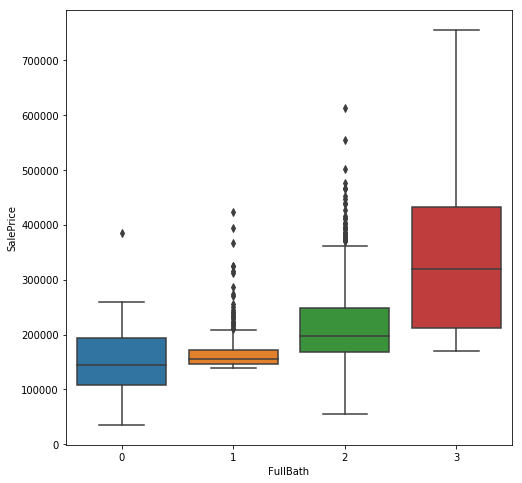

In [40]:
data=pd.concat([df['SalePrice'],df['FullBath']],axis=1)
f,ax=plt.subplots(figsize=(8,8))
sns.boxplot(x="FullBath",y="SalePrice",data=data)

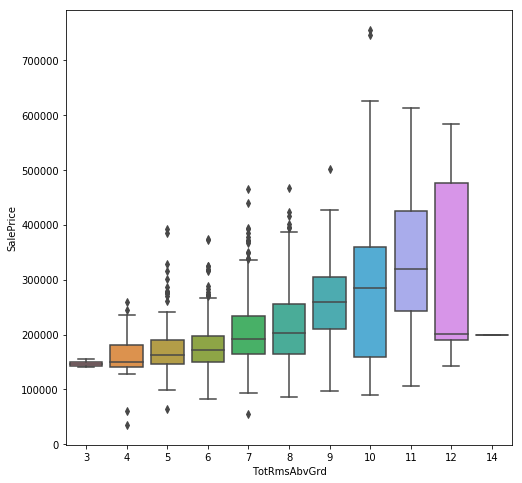

In [42]:
data=pd.concat([df['SalePrice'],df['TotRmsAbvGrd']],axis=1)
f,ax=plt.subplots(figsize=(8,8))
sns.boxplot(x="TotRmsAbvGrd",y="SalePrice",data=data)

In [43]:
df=df.drop(df[(df['TotRmsAbvGrd']==14)].index).reset_index(drop=True)

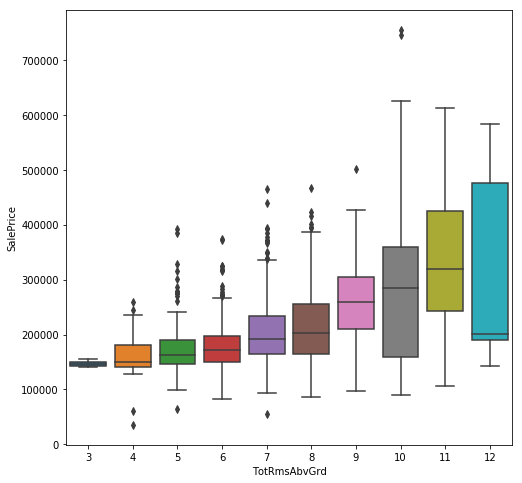

In [44]:
data=pd.concat([df['SalePrice'],df['TotRmsAbvGrd']],axis=1)
f,ax=plt.subplots(figsize=(8,8))
sns.boxplot(x="TotRmsAbvGrd",y="SalePrice",data=data)

### Now lets take a look at missing values

In [24]:
df.select_dtypes(include=['object']).isnull().any()

MSZoning         False
Street           False
Alley             True
LandContour      False
LotConfig        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
Electrical        True
FireplaceQu       True
GarageType        True
GarageFinish      True
GarageQual        True
GarageCond        True
PoolQC            True
Fence             True
MiscFeature       True
SaleType         False
SaleCondition    False
dtype: bool

In [ ]:
lbl=['Alley','MasVnrType','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
